In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('Covidalgeria2020-Copy1.csv')

In [31]:

df.head()

,Unnamed: 0,date,temp,weather,Country_Region,Last Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
0,34,02-25-2020,15 °C,Passing clouds,Algeria,2020-02-25T23:43:03,1.0,0.0,0.0,NaN,NaN,NaN
1,35,02-26-2020,18 °C,Scattered clouds,Algeria,2020-02-25T23:43:03,1.0,0.0,0.0,NaN,NaN,NaN
2,36,02-27-2020,17 °C,Passing clouds,Algeria,2020-02-25T23:43:03,1.0,0.0,0.0,NaN,NaN,NaN
3,37,02-28-2020,20 °C,Sunny,Algeria,2020-02-25T23:43:03,1.0,0.0,0.0,NaN,NaN,NaN
4,38,02-29-2020,19 °C,Scattered clouds,Algeria,2020-02-25T23:43:03,1.0,0.0,0.0,NaN,NaN,NaN


In [32]:
# suprimer des variables inutiles 
df.drop(['Unnamed: 0','temp', 'weather','Country_Region','Last Update', 'Incident_Rate','Case_Fatality_Ratio']
,axis=1, inplace=True)

In [33]:
#renommer les variables pour éviter les majuscules 
df.rename(columns={ 'Confirmed': 'confirmed','Deaths': 'deaths','Recovered': 'recovered','Active': 'active'},
inplace=True)

In [34]:
df.head()

,date,confirmed,deaths,recovered,active
0,02-25-2020,1.0,0.0,0.0,NaN
1,02-26-2020,1.0,0.0,0.0,NaN
2,02-27-2020,1.0,0.0,0.0,NaN
3,02-28-2020,1.0,0.0,0.0,NaN
4,02-29-2020,1.0,0.0,0.0,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       311 non-null    object 
 1   confirmed  311 non-null    float64
 2   deaths     311 non-null    float64
 3   recovered  311 non-null    float64
 4   active     285 non-null    float64
dtypes: float64(4), object(1)
memory usage: 12.3+ KB


In [36]:
# l'encodege des types de varibales 
df.date = pd.to_datetime(df.date)
df.confirmed = df.confirmed.astype(int)
df.deaths = df.deaths.astype(int)
df.recovered = df.recovered.astype(int)
#df.active = df.active.astype(int) marche pas car active contient les NAN

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       311 non-null    datetime64[ns]
 1   confirmed  311 non-null    int64         
 2   deaths     311 non-null    int64         
 3   recovered  311 non-null    int64         
 4   active     285 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 12.3 KB


In [38]:
# regler le probleme des NAN 
#df.dropna() cest pas utiles car on a la formule de calcul de df.active
actived  = df.confirmed - df.deaths - df.recovered
df.active = actived 

In [39]:
df.head()

,date,confirmed,deaths,recovered,active
0,2020-02-25,1,0,0,1
1,2020-02-26,1,0,0,1
2,2020-02-27,1,0,0,1
3,2020-02-28,1,0,0,1
4,2020-02-29,1,0,0,1


In [40]:
#changer le type de varibale active 
df.active = df.active.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       311 non-null    datetime64[ns]
 1   confirmed  311 non-null    int64         
 2   deaths     311 non-null    int64         
 3   recovered  311 non-null    int64         
 4   active     311 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 12.3 KB


In [41]:
df.head(50)

,date,confirmed,deaths,recovered,active
0,2020-02-25,1,0,0,1
1,2020-02-26,1,0,0,1
2,2020-02-27,1,0,0,1
3,2020-02-28,1,0,0,1
4,2020-02-29,1,0,0,1
5,2020-03-01,1,0,0,1
6,2020-03-02,3,0,0,3
7,2020-03-03,5,0,0,5
8,2020-03-04,12,0,0,12
9,2020-03-05,12,0,0,12


In [42]:
# les dates ne sont pas trié par le bon ordre 
# on les tri dans une nouvelle dataframe
dfn =df.sort_values(by='date')

In [43]:
#on renitialise l'index
dfn.reset_index( inplace=True)


In [44]:
# on supprime la colonne de l'ancien index  
dfn.drop(['index'],axis=1 ,inplace=True)

In [45]:
#la forme finale de la data 
dfn.head(50)

,date,confirmed,deaths,recovered,active
0,2020-02-25,1,0,0,1
1,2020-02-26,1,0,0,1
2,2020-02-27,1,0,0,1
3,2020-02-28,1,0,0,1
4,2020-02-29,1,0,0,1
5,2020-03-01,1,0,0,1
6,2020-03-02,3,0,0,3
7,2020-03-03,5,0,0,5
8,2020-03-04,12,0,0,12
9,2020-03-05,12,0,0,12


In [59]:
dfn.iloc[0:5, :]

,date,confirmed,deaths,recovered,active
0,2020-02-25,1,0,0,1
1,2020-02-26,1,0,0,1
2,2020-02-27,1,0,0,1
3,2020-02-28,1,0,0,1
4,2020-02-29,1,0,0,1


In [47]:
dfn.iloc[5:36,:]

,date,confirmed,deaths,recovered,active
5,2020-03-01,1,0,0,1
6,2020-03-02,3,0,0,3
7,2020-03-03,5,0,0,5
8,2020-03-04,12,0,0,12
9,2020-03-05,12,0,0,12
10,2020-03-06,17,0,0,17
11,2020-03-07,17,0,0,17
12,2020-03-08,19,0,0,19
13,2020-03-09,20,0,0,20
14,2020-03-10,20,0,0,20


In [48]:
dfn.iloc[36:66,:]

,date,confirmed,deaths,recovered,active
36,2020-04-01,847,58,61,728
37,2020-04-02,986,86,61,839
38,2020-04-03,1171,105,62,1004
39,2020-04-04,1251,130,90,1031
40,2020-04-05,1320,152,90,1078
41,2020-04-06,1423,173,90,1160
42,2020-04-07,1468,193,113,1162
43,2020-04-08,1572,205,237,1130
44,2020-04-09,1666,235,347,1084
45,2020-04-10,1761,256,405,1100


(array([102.,  38.,  17.,  19.,  32.,  46.,  13.,   9.,  12.,  23.]),
 array([1.00000e+00, 9.96190e+03, 1.99228e+04, 2.98837e+04, 3.98446e+04,
        4.98055e+04, 5.97664e+04, 6.97273e+04, 7.96882e+04, 8.96491e+04,
        9.96100e+04]),
 <BarContainer object of 10 artists>)

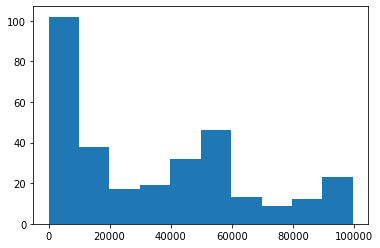

In [49]:
e =dfn.iloc[66:97,:]
plt.hist(dfn.confirmed)


1ere vague de 10000 cas jusqu'a 40000 cas / 2 eme vague de 60000 a 90000 cas 

In [65]:
dfn.loc [(dfn.confirmed> 10000) & (dfn.confirmed< 40000)].date

102   2020-06-06
103   2020-06-07
104   2020-06-08
105   2020-06-09
106   2020-06-10
         ...    
172   2020-08-15
173   2020-08-16
174   2020-08-17
175   2020-08-18
176   2020-08-19
Name: date, Length: 75, dtype: datetime64[ns]

premiere vague de 06 juin au 19 aout 

In [64]:
dfn.loc [(dfn.confirmed> 60000) & (dfn.confirmed< 90000)].date

254   2020-11-05
255   2020-11-06
256   2020-11-07
257   2020-11-08
258   2020-11-09
259   2020-11-10
260   2020-11-11
261   2020-11-12
262   2020-11-13
263   2020-11-14
264   2020-11-15
265   2020-11-16
266   2020-11-17
267   2020-11-18
268   2020-11-19
269   2020-11-20
270   2020-11-21
271   2020-11-22
272   2020-11-23
273   2020-11-24
274   2020-11-25
275   2020-11-26
276   2020-11-27
277   2020-11-28
278   2020-11-29
279   2020-11-30
280   2020-12-01
281   2020-12-02
282   2020-12-03
283   2020-12-04
284   2020-12-05
285   2020-12-06
286   2020-12-07
287   2020-12-08
Name: date, dtype: datetime64[ns]

deuxieme vague de 05 novembre au 08 decembre

(array([47., 36., 33., 32., 26., 31., 40., 22., 16., 28.]),
 array([   0. ,  275.6,  551.2,  826.8, 1102.4, 1378. , 1653.6, 1929.2,
        2204.8, 2480.4, 2756. ]),
 <BarContainer object of 10 artists>)

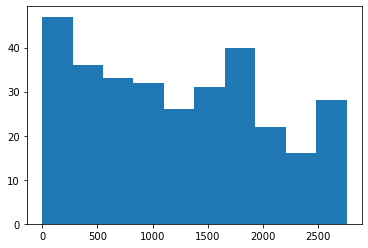

In [52]:
plt.hist(dfn.deaths)

In [63]:
# premiere vague des morts 
dfn.loc [(dfn.deaths> 1100) & (dfn.deaths< 1400)].date

148   2020-07-22
149   2020-07-23
150   2020-07-24
151   2020-07-25
152   2020-07-26
153   2020-07-27
154   2020-07-28
155   2020-07-29
156   2020-07-30
157   2020-07-31
158   2020-08-01
159   2020-08-02
160   2020-08-03
161   2020-08-04
162   2020-08-05
163   2020-08-06
164   2020-08-07
165   2020-08-08
166   2020-08-09
167   2020-08-10
168   2020-08-11
169   2020-08-12
170   2020-08-13
171   2020-08-14
172   2020-08-15
173   2020-08-16
174   2020-08-17
175   2020-08-18
Name: date, dtype: datetime64[ns]

In [66]:
# deuxieme vague des morts 
dfn.loc [(dfn.deaths> 2000) & (dfn.deaths< 2500)].date

254   2020-11-05
255   2020-11-06
256   2020-11-07
257   2020-11-08
258   2020-11-09
259   2020-11-10
260   2020-11-11
261   2020-11-12
262   2020-11-13
263   2020-11-14
264   2020-11-15
265   2020-11-16
266   2020-11-17
267   2020-11-18
268   2020-11-19
269   2020-11-20
270   2020-11-21
271   2020-11-22
272   2020-11-23
273   2020-11-24
274   2020-11-25
275   2020-11-26
276   2020-11-27
277   2020-11-28
278   2020-11-29
279   2020-11-30
280   2020-12-01
281   2020-12-02
282   2020-12-03
283   2020-12-04
Name: date, dtype: datetime64[ns]

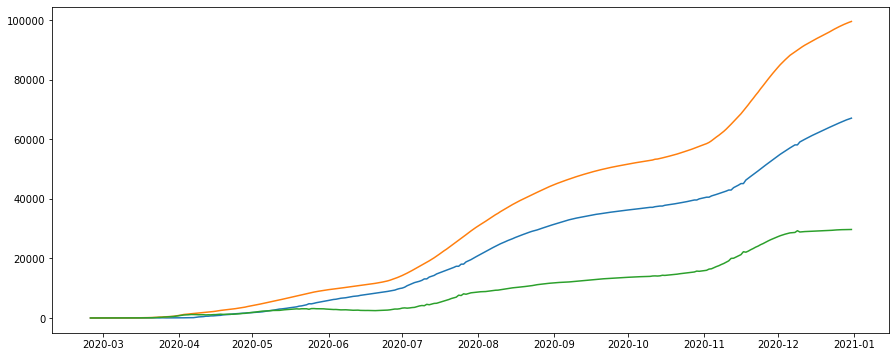

In [62]:
# comportement de variable 'confirmé' avec celui de 'recovered' et 'active' 
a=dfn.date
b= dfn.recovered
c= dfn.confirmed
d= dfn.active

plt.figure(figsize=(15,6))
plt.plot(a,b)
plt.plot(a,c)
plt.plot(a,d)

plt.show()
